In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '0'
AG = '1'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 95
INFO:root:Data length after removing invalid tweets: 25
INFO:root:Original data length: 9000
INFO:root:After applying filters: 1064
INFO:root:Data length after removing invalid tweets: 291
INFO:root:Explained variance of the SVD step: 50%


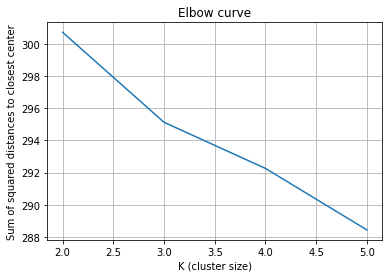

In [3]:
%matplotlib inline
# Lower values are better
km.plot_elbow_curve(max_k=5, X=X)

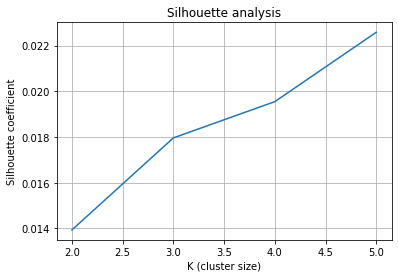

In [4]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=5, X=X)

In [5]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 country want time needs america immigration life deport illegals right

Cluster 1:
 bitch dick ass like rape bitches fuck hate hoe shit

Cluster 2:
 women kitchen stay men bad rape woman whore beautiful like

Cluster 3:
 wall need hell refugees migrants stop border just let build

Cluster 4:
 illegal aliens alien immigrants american criminals people control immigration support



In [6]:
NUM_SAMPLES=5
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [187  53  89 202 222]
['3816', '#BuildThatWall #Meritbased get the ILLEGAL situation under control. ILLEGAL is ILLEGAL. #MAGA #AMERICAFIRST #BacktheBlue #ICE #Respect', '1', '0', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['756', 'Illegal Criminals EVERYWHERE #BuildThatWall !!', '1', '0', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['1414', '<ILLEGAL ALIENS>If we want to make our voices heardand stop the Illegal invasion of America,If we truly want to tackle Illegal Migration, rememberAmnesty only entices it.We need to:#EndDACA#EndChainMigrationInsist there be#NoAmnesty #EndIllegalBirthrightCitizenship1/1', '1', '0', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['4152', 'Another fine example of why illegal aliens are problem. If your here illegally, why would you want to draw attention to yourself this way. Illegal aliens have no fear of our legal sys